# Experiments

## First Random Individual 

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import networkx as nx
import numpy as np

sys.path.append(os.path.abspath(".."))
from src.loading_data import load_graph

In [2]:
def loading_graphs(path, size=""):
    if os.path.exists(path):
        graph = load_graph(path)
        print(f"{size} Graph Loaded")
        print(f"Nodes: {graph.number_of_nodes()}")
        print(f"Edges: {graph.number_of_edges()}")

    else:
        print(f"File {path} not found.")
    
    return graph

In [3]:
def plot_graph(graph, title="Graph"):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph, seed = 42)
    nx.draw(graph, pos,
            with_labels=True,
            node_color='lightblue',
            edge_color='gray',
            node_size=500,
            font_size=10)
    
    plt.title(title)
    plt.show()

In [4]:
from src.chromosome import Individual
from src.fitness import evaluate_fitness

def create_individual(graph):
    num_nodes = graph.number_of_nodes()
    return Individual(num_nodes, max_colors=num_nodes)

In [5]:
def plot_colored_graph(G, individual, title="GCP Solution"):
    plt.figure(figsize = (8, 6))
    pos = nx.spring_layout(G, seed = 42)

    unique_genes = np.unique(individual.genes)
    cmap = plt.cm.rainbow
    norm = plt.Normalize(vmin=min(individual.genes), vmax=max(individual.genes))

    nx.draw(G, pos,
            with_labels=True,
            node_color=individual.genes,
            cmap=cmap,
            edge_color='black',
            node_size=600,
            font_size=12,
            width=1.5)
    
    legend_handles = []
    for gene in sorted(unique_genes):
        color = cmap(norm(gene))
        
        line = mlines.Line2D([], [], color=color, marker='o', linestyle='None',
                              markersize=10, label=f'Color ID: {gene}')
        legend_handles.append(line)

    plt.legend(handles=legend_handles, title="Colors", 
               bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.title(f"{title}\nConflicts: {individual.conflicts} | Total Colors: {len(unique_genes)}")
    plt.show()

Small Graph Loaded
Nodes: 11
Edges: 20
First Visualization of the Small Graph


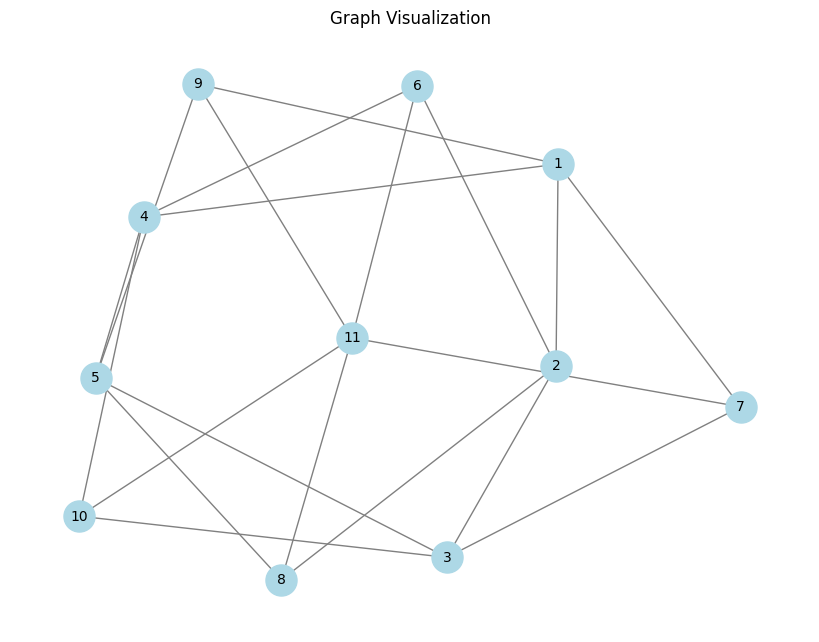

Conflict between node 1 and node 7
Conflict between node 5 and node 8


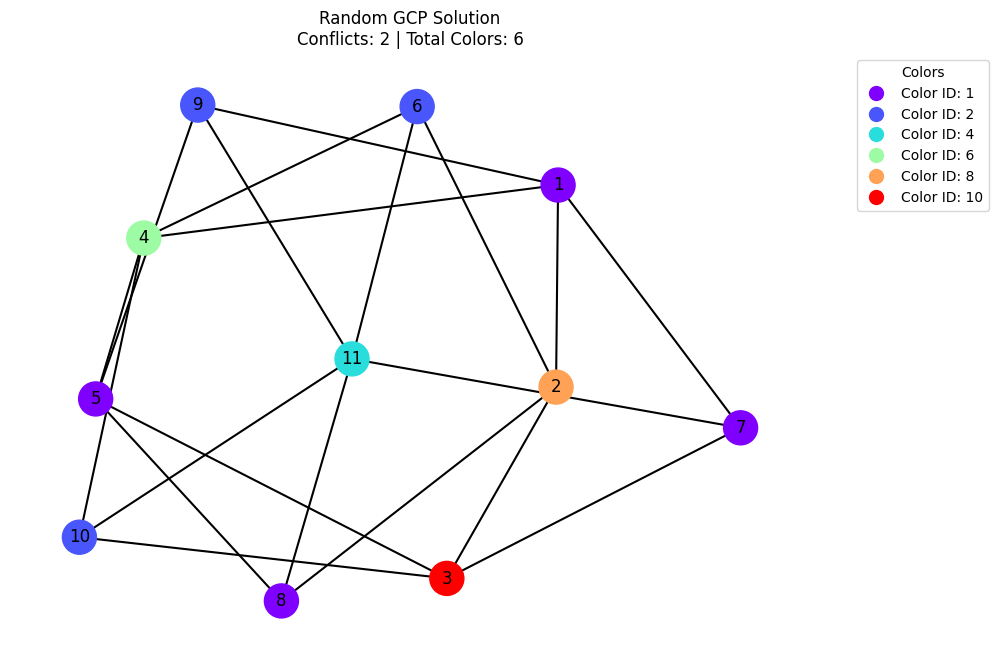

Initial Random Individual:
Genes: [ 1  8 10  6  1  2  1  1  2  2  4]
Conflicts: 2
Fitness Score: 0.3333


In [6]:
datasets = {
    "Small": "../data/myciel3.col.txt",
}

for size, path in datasets.items():
    graph = loading_graphs(path, size)

    print(f"First Visualization of the {size} Graph")
    plot_graph(graph, title="Graph Visualization")

    ind = create_individual(graph)

    fit = evaluate_fitness(ind, graph)

    plot_colored_graph(graph, ind, title="Random GCP Solution")

    print(f"Initial Random Individual:")
    print(f"Genes: {ind.genes}")
    print(f"Conflicts: {ind.conflicts}")
    print(f"Fitness Score: {ind.fitness:.4f}")
    